# Medical Imaging
## 2021-2022

### Lab 1
João Félix Pimenta | Miguel Joaquim Roque Fernandes | Maja Milekic

In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from roipoly import RoiPoly
from scipy.ndimage import gaussian_filter

### 0. Loading 3D image data and getting dimensions and basic stats

In [2]:
x = loadmat('ct.mat')

# select variable 'im' and convert it from dictionary to numpy array
im = np.array(x['ct'])

# print image size
[rows, cols, slices] = im.shape
print(rows, cols, slices)

512 512 256


### 1. Display a histogram of the CT image intensities (i.e. CT indexes), and then a histogram of the corresponding attenuation coefficients, by converting CT indexes to attenuation coefficients.

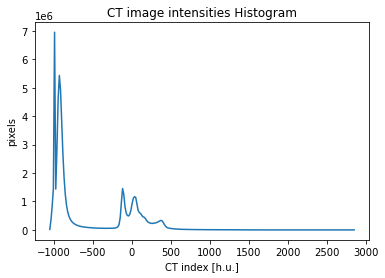

In [3]:
# create the histogram
histogram, bin_edges = np.histogram(im, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("CT image intensities Histogram")
plt.xlabel("CT index [h.u.]")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

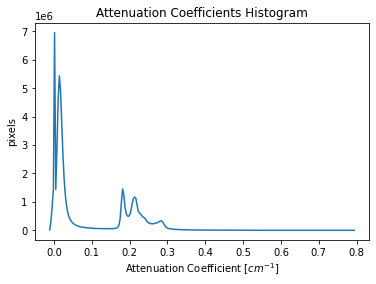

In [4]:
mu = im * 0.206 / 1000 + 0.206

# create the histogram
histogram, bin_edges = np.histogram(mu, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("Attenuation Coefficients Histogram")
plt.xlabel("Attenuation Coefficient [$cm^{-1}$]")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

### 2. Display 15 representative slices of the image of attenuation coefficients for each orientation - axial (x,y), sagittal (x,z) and coronal (y,z):
a. applying rotations when appropriate;
b. using an adequate intensity scale for tissue visualization;
c. using an intensity scale that is matched across slices.

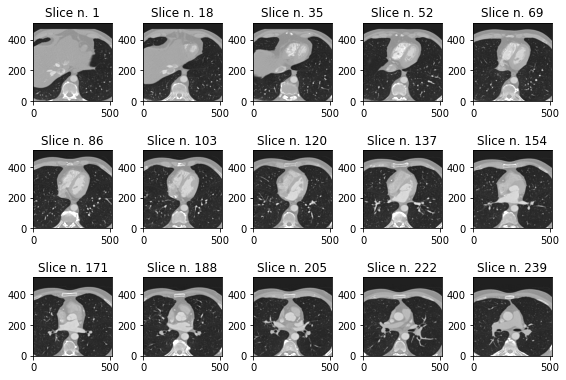

In [5]:
slice_jump = slices//15

plt.figure('Axial Slices')

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=1.4, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)

for n in range(1, 16):
    sl = 1 + (n-1)*slice_jump
    axsltmp = mu[:, :, sl]
    plt.subplot(3, 5, n)
    plt.imshow(axsltmp, cmap='gray', origin='lower', vmin=-0.05, vmax=0.35)
    plt.title('Slice n. %i' %sl)

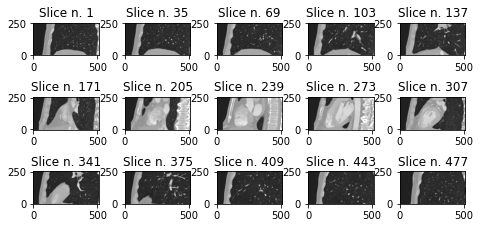

In [6]:
slice_jump = cols//15

plt.figure('Sagital Slices')

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.8,
                    wspace=0.4, 
                    hspace=0.4)

for n in range(1, 16):
    sl = 1 + (n-1)*slice_jump
    sagsltmp = mu[:, sl, :]
    plt.subplot(3, 5, n)
    plt.imshow(np.rot90(sagsltmp,3), cmap='gray', origin='lower', vmin=-0.05, vmax=0.35)
    plt.title('Slice n. %i' %sl)

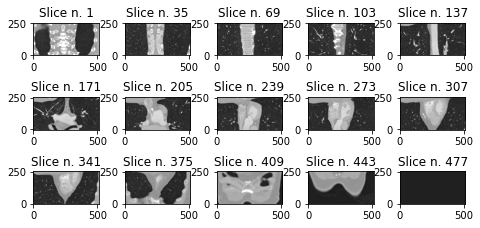

In [7]:
slice_jump = rows//15

plt.figure('Coronal Slices')

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

for n in range(1, 16):
    sl = 1 + (n-1)*slice_jump
    corsltmp = mu[sl, :, :]
    plt.subplot(3, 5, n)
    plt.imshow(np.rot90(corsltmp), cmap='gray', origin='lower', vmin=-0.05, vmax=0.35)
    plt.title('Slice n. %i' %sl)

### 3. Simulate the planar X-ray image that would be obtained by projection along x, assuming that the incident X-ray beam has an intensity I0 = 1100 photons/pixel.
a. Compute the voxel size along each direction
b. Write down the attenuation equation, and apply it
c. Display the resulting projection image

a. FOV  $ = 200$x$200$x$260 mm^{3} $
Matrix_size (no. of Pixels)  $ = 512$x$512$x$256 $
Voxel size = FOV / no. of Pixels $ = 0.39$x$0.39$x$1.015625 mm^{3}$

b. $ I = I_{0}*e^{-\mu*x} $

In [16]:
# c.
I0 = 1100
depth = 200/rows/10;
planar = I0*np.exp(-sum(mu)*depth)

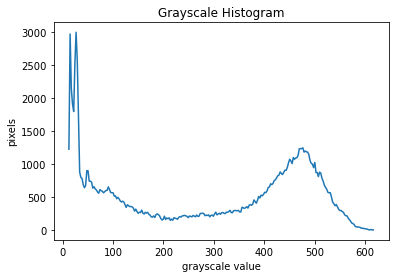

In [17]:
# create the histogram
histogram, bin_edges = np.histogram(planar, bins=256)
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)


[[ 56.05686   56.245907  57.46395  ... 370.29446  369.70908  367.71445 ]
 [ 56.24226   56.86021   57.83801  ... 377.71704  378.07712  375.79263 ]
 [ 56.26051   57.281887  58.256927 ... 384.02036  383.93887  379.2069  ]
 ...
 [382.80292  389.9776   393.80582  ... 217.09668  214.334    211.91478 ]
 [385.5244   386.64664  387.09503  ... 212.70518  211.34727  212.4941  ]
 [387.05923  383.51218  381.59927  ... 209.25632  209.84729  213.96536 ]]


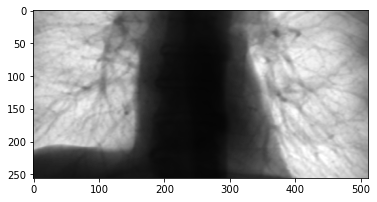

In [18]:
plt.figure
print(planar)
plt.imshow(np.rot90(planar), cmap="gray", vmin = 0, vmax=600)


### 4. Now simulate the planar X-ray image that would be obtained by projection along x and y:
a. Quadrupling the current intensity at the same time as using half the X-ray
tube voltage: what changed? (hint: look at the histograms!)
b. What would happen to the image if the X-ray energy was significantly
increased? Discuss this, explaining why μbone >> μtissue at low X-ray
energies, while the two values of μ become closer as the X-ray energy
increases.

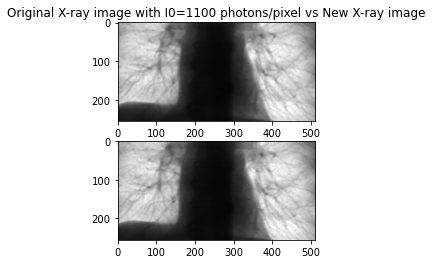

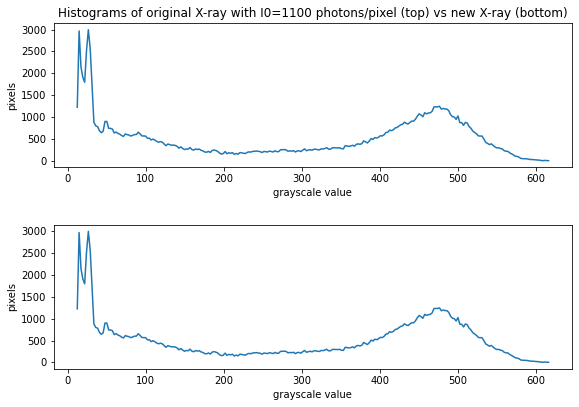

In [27]:
#a

#Projection along x

plt.figure()
plt.subplot(2,1,1)
plt.title("Original X-ray image with I0=1100 photons/pixel vs New X-ray image")
plt.imshow(np.rot90(planar), cmap='gray', vmin=0, vmax=600)

#Intensity of the X-ray beam varies directly with the tube current intensity and with the squared tube voltage
#So: Change current intensity to the quadruple - its the same as multiplying by 4 the intensity of the X-ray beam
#    Change tube voltage to half - its the same as multiplying by 1/4 the intensity of the X-ray beam
#In then end, nothing changes and the X-ray images remain the same (as we can also see from the histograms)
planar_new = planar*4*(1/2)**2

plt.subplot(2,1,2)
plt.imshow(np.rot90(planar_new), cmap='gray', vmin=0, vmax=600)

#Histograms of both cases
histogram, bin_edges = np.histogram(planar, bins=256)
plt.figure()
# set the spacing between subplots
plt.subplot(2,1,1)
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=1.4, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.title("Histograms of original X-ray with I0=1100 photons/pixel (top) vs new X-ray (bottom)")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

histogram2, bin_edges2 = np.histogram(planar_new, bins=256)
plt.subplot(2,1,2)
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges2[0:-1], histogram2)

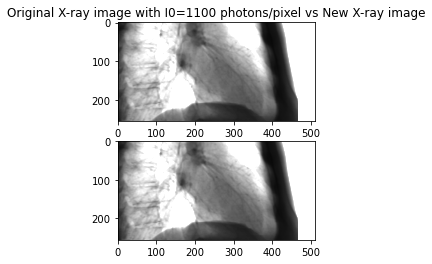

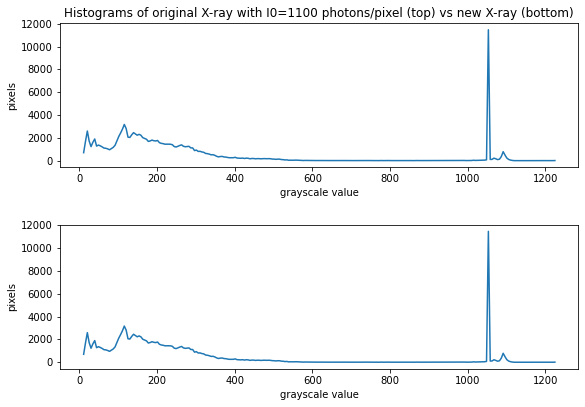

In [35]:
#Projection along y
#first we need to calculate it as we did for projection along x
depth = 200/cols/10;

planar_y = np.zeros((rows,slices)) #projection along y -> only consider the second dimension (cols)
for i in range(rows):
    for k in range(slices):
        for j in range(cols):
            planar_y[i,k] = planar_y[i,k] + mu[i,j,k]*depth    #sum all coefficients in y direction 
        planar_y[i,k] = I0*np.exp(-planar_y[i,k])              #apply attenuation equation

plt.figure()
plt.subplot(2,1,1)
plt.title("Original X-ray image with I0=1100 photons/pixel vs New X-ray image")
plt.imshow(np.rot90(planar_y), cmap='gray', vmin=0, vmax=300)

#same as in projection along x - changes in tube current and voltage lead to no differences
planar_y_new = planar_y*4*(1/2)**2

plt.subplot(2,1,2)
plt.imshow(np.rot90(planar_y_new), cmap='gray', vmin=0, vmax=300) #had to adjust the intensity range (from 600 to 900 photons)

#Histograms of both cases
histogram, bin_edges = np.histogram(planar_y, bins=256)
plt.figure()
# set the spacing between subplots
plt.subplot(2,1,1)
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=1.4, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.title("Histograms of original X-ray with I0=1100 photons/pixel (top) vs new X-ray (bottom)")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges[0:-1], histogram)

histogram2, bin_edges2 = np.histogram(planar_y_new, bins=256)
plt.subplot(2,1,2)
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.plot(bin_edges2[0:-1], histogram2)

b. If the X-ray energy was significantly increased, the contrast would be much lower, as in higher energies, the Compton Effect dominates (in opposition to the photoeletric effect, which dominates only in lower energies).

For low energies, where the photoelectric effect dominates, there is dependence on the atomic number of the target (Z). That is why μbone >> μtissue, as the attenuation coefficient μ is higher when Z increases, and Zbone >> Ztissue. In this way, there will be significant contrast in the images. For high energies, where the Compton effect dominates, scattering occurs, and there is no dependence on the atomic number. The attenuation coefficients μbone and μtissue will be similar, thus there will be poor contrast in the images obtained.